In [1]:
# NewsCloud3   文字雲結合google search

import requests
from bs4 import BeautifulSoup

# Google 搜尋 URL
google_url = 'https://www.google.com.tw/search'

# 查詢參數
my_params = {'q': '多天好冷'}

# 下載 Google 搜尋結果
r = requests.get(google_url, params = my_params)

# 確認是否下載成功
if r.status_code == requests.codes.ok:
  # 以 BeautifulSoup 解析 HTML 原始碼
  soup = BeautifulSoup(r.text, 'html.parser')

  # 觀察 HTML 原始碼
  #print(soup.prettify())

  # 以 CSS 的選擇器來抓取 Google 的搜尋結果
  items = soup.select('div.kCrYT > a[href^="/url"]')
 
  for i in items:
    # 標題
    print("標題：" + i.text)
    # 網址
    print("網址：" + i.get('href'))

標題：多滿餘溫室農場- 蕃茄報報: 前幾天，好冷好冷~   終於有冬天的感覺了 ...https://zh-tw.facebook.com › duomanyu › posts › 
網址：/url?q=https://zh-tw.facebook.com/duomanyu/posts/-%25E8%2595%2583%25E8%258C%2584%25E5%25A0%25B1%25E5%25A0%25B1%25E5%2589%258D%25E5%25B9%25BE%25E5%25A4%25A9%25E5%25A5%25BD%25E5%2586%25B7%25E5%25A5%25BD%25E5%2586%25B7%25E7%25B5%2582%25E6%2596%25BC%25E6%259C%2589%25E5%2586%25AC%25E5%25A4%25A9%25E7%259A%2584%25E6%2584%259F%25E8%25A6%25BA%25E4%25BA%2586%25E5%25A4%25A9%25E6%25B0%25A3%25E8%25B6%258A%25E5%2586%25B7%25E5%25B0%258F%25E7%2595%25AA%25E8%258C%2584%25E8%25B6%258A%25E7%2594%259C%25E5%2591%25A2%25E9%2581%258E%25E5%25B9%25BE%25E5%25A4%25A9%25E5%258F%2588%25E6%259C%2589%25E4%25B8%2580%25E6%25B3%25A2%25E5%2586%25B7%25E6%25B0%25A3%25E5%259C%2598%25E8%25A6%2581%25E4%25BE%2586%25E5%25A4%25A7%25E5%25AE%25B6%25E8%25A6%2581%25E6%25B3%25A8%25E6%2584%258F%25E4%25BF%259D%25E6%259A%2596%25E5%2596%2594%25E5%25A5%25BD%25E5%2586%25B7-%25E5%25A5%25BD%25E5%2586%25B7-%25E5%25A5%25BD%25E7%2594%259C-%25E5%25A5%2

Building prefix dict from C:\Users\user\斷詞與文字雲\dictionary\dict.txt.big.txt ...
Loading model from cache C:\Users\user\AppData\Local\Temp\jieba.u26dde8eadd1d88361d80552aac827a44.cache


多滿餘溫室農場- 蕃茄報報: 前幾天，好冷好冷~   終於有冬天的感覺了 ...https://zh-tw.facebook.com › duomanyu › posts › 米奇堡- 這幾天風好大好冷好冷     來吃早餐時多穿點好嗎   12/10 ...https://zh-tw.facebook.com › MickyBao302 › photos › 這幾天風好大好冷...冷天運動能燃燒更多卡路里嗎？|天下雜誌https://www.cw.com.tw › article › article.action天冷了要注意身體- 每日頭條https://kknews.cc › 健康變天就痠、變冷就痛四招讓你遠離「天氣痛」！ - 康健雜誌https://www.commonhealth.com.tw › article › article.action好冷！淡水清晨8.1度刷新低溫紀錄鄭明典：還會再冷幾天-風傳媒https://www.storm.mg › 國內天冷猝死案例多，3方法預防冬季心血管疾病|早安健康https://www.edh.tw › 健康 › 健康話題 › 養生保健濕冷誘發頭痛、身體疼痛？神經科醫師5招打擊天冷疼痛|早安健康https://www.edh.tw › article這幾天好冷喔@ 1＋1＝3 玩學樂生活:: 痞客邦::https://yoyoman822.pixnet.net › blog › post天冷容易心情差！養成這些習慣讓快樂多一些| Heho健康https://heho.com.tw › archives


Loading model cost 1.090 seconds.
Prefix dict has been built succesfully.


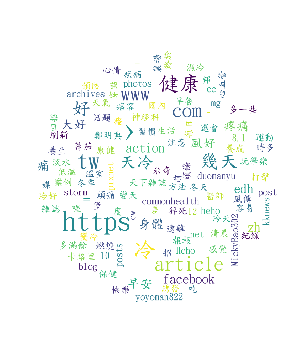

In [4]:
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import jieba
import numpy as np
from collections import Counter

#讀取文字檔資料
#text = open('news1.txt', "r",encoding="utf-8").read()  #讀文字資料

#讀取Google資料

text = ''
for i in items:
    # 標題
    text = text + i.text
print( text)

jieba.set_dictionary('dictionary/dict.txt.big.txt')
with open('dictionary/stopWord_cloud.txt', 'r', encoding='utf-8-sig') as f:  #設定停用詞
#with open('dictionary/stopWord_cloudmod.txt', 'r', encoding='utf-8-sig') as f:  #設定停用詞
    stops = f.read().split('\n')   
terms = []  #儲存字詞
for t in jieba.cut(text, cut_all=False):  #拆解句子為字詞
    if t not in stops:  #不是停用詞
        terms.append(t)
diction = Counter(terms)
# 可列印詞的統計數量
#print(diction)

#font = "C:\\Windows\\Fonts\\simsun.ttc"  #設定字型(宋體)
font = "C:\\Windows\\Fonts\\kaiu.ttf"  #設定字型(宋體)
#wordcloud = WordCloud(font_path="C:\\Windows\\Fonts\\simsun.ttc")

mask = np.array(Image.open("circle.png"))  #設定文字雲形狀 
#wordcloud = WordCloud(font_path=font) 
wordcloud = WordCloud(background_color="white",mask=mask, font_path=font)  #背景顏色預設黑色,改為白色,字體為宋體
wordcloud.generate_from_frequencies(diction)  #產生文字雲

#產生圖片
plt.figure(figsize=(6,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

wordcloud.to_file("news_Wordcloud.png")  #存檔 